### Imports

In [23]:
import data
import os
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.base import clone

### Dataset Extraction
> For sklearn we use 10,000 training samples across 10 categories

In [24]:
doodle_map, X, y = data.auto_load(size=1000, n_files=10)

In [25]:
X.shape

(10000, 784)

In [26]:
y.shape

(10000,)

In [27]:
len(doodle_map)

10

### Split Test Train

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

### Learning Curve

In [29]:
def learning_curve(model, X_train, X_test, y_train, y_test):
    train_scores = []
    test_scores = []
    
    for i in np.arange(0.1, 1.1, 0.1):
        train_size = int(len(X_train) * i)
        X_train_ = X_train[:train_size]
        y_train_ = y_train[:train_size]
        
        model_ = clone(model)
        model_.fit(X_train_, y_train_)
        train_pred = model_.predict(X_train_)
        test_pred = model_.predict(X_test)
        
        train_acc = accuracy_score(y_train_, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        
        train_scores.append(train_acc)
        test_scores.append(test_acc)
        
    plt.plot(train_scores, label='Train')
    plt.plot(test_scores, label='Test')
    plt.title('Learning Curve')
    plt.xlabel('Accuracy')
    plt.ylabel('% of Training Size')
    plt.xticks(range(10), (np.arange(0.1, 1.1, 0.1) * 100).astype(int))
    plt.ylim(0.0, 1.01)
    plt.legend()
    
    print(f'Final Training Accuracy: {train_scores[-1] * 100}%')
    print(f'Final Testing Accuracy: {test_scores[-1] * 100}%')

### Types of Model
#### Logistic Regression

In [30]:
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=10000, n_jobs=-1)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
train_pred = model.predict(X_train)
print(f'Training Accuracy: {accuracy_score(y_train, train_pred) * 100}%')

Training Accuracy: 78.45714285714286%


In [32]:
test_pred = model.predict(X_test)
print(f'Training Accuracy: {accuracy_score(y_test, test_pred) * 100}%')

Training Accuracy: 59.199999999999996%


Final Training Accuracy: 78.45714285714286%
Final Testing Accuracy: 59.199999999999996%


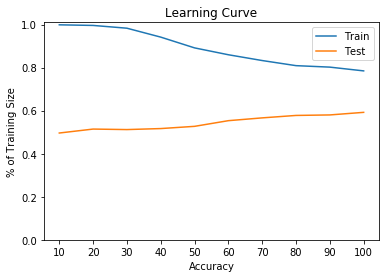

In [33]:
learning_curve(model, X_train, X_test, y_train, y_test)

#### Random Forest Classifier

In [34]:
model = RandomForestClassifier(n_estimators=50, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [35]:
train_pred = model.predict(X_train)
print(f'Training Accuracy: {accuracy_score(y_train, train_pred) * 100}%')

Training Accuracy: 100.0%


In [36]:
test_pred = model.predict(X_test)
print(f'Training Accuracy: {accuracy_score(y_test, test_pred) * 100}%')

Training Accuracy: 71.06666666666666%


Final Training Accuracy: 100.0%
Final Testing Accuracy: 70.39999999999999%


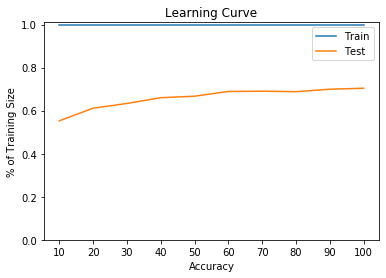

In [37]:
learning_curve(model, X_train, X_test, y_train, y_test)

## Support Vector Classifier
> Tried using SVC but didn't work :( (Takes too long)

In [38]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
train_pred = svc.predict(X_train)
print(f'Training Accuracy: {accuracy_score(y_train, train_pred) * 100}%')

Training Accuracy: 75.84285714285714%


In [40]:
test_pred = svc.predict(X_test)
print(f'Training Accuracy: {accuracy_score(y_test, test_pred) * 100}%')

Training Accuracy: 71.8%


In [41]:
#learning_curve(svc, X_train, X_test, y_train, y_test)